## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Nombre y Apellido: Juan Lauría

***
## Estimación espectral


In [1]:
## Inicialización del Notebook del TP3

import numpy as npy
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

fs = 1000 # Hz

# Entre 10 - 100 realizaciones de N muestras

# Insertar aquí el código para inicializar tu notebook
########################################################

def mi_func_sen (vmax, dc, ff, ph, nn, fs):
    
   tt = npy.arange(nn/fs, step=1/fs)          
   
   xx = vmax * npy.sin((2 * npy.pi * ff * tt) + ph) + dc
   
   return tt,xx

def mi_ruido (N,fs,sigma,mu):
    tt = npy.arange(N/fs, step=1/fs)
    ruido = npy.random.normal(mu,sigma,N)
    
    return tt,ruido

def fft_modulo_fase (tt,senial,fs,N):
    df = fs / N
    ff = npy.linspace(0, (N-1)*df, N).flatten()
    
    #senial_fft = npy.fft.fft(senial)
    senial_fft = spy.fft.fft(senial)

    modulo = npy.abs(senial_fft)
    fase = npy.angle (senial_fft)
    fase [modulo < 1] = 0
    
    return ff[ff <= fs/2],(2/N)*modulo[ff <= fs/2],fase[ff <= fs/2]
    

def mi_func_ADC (vmax, signal,nbits):
    # q = vmax / (2**(nbits-1) - 1)
    # value = signal / q
    # samples = npy.round(value)
    # return samples

    mlevel = (2 ** (nbits - 1))
    qx = (2*vmax/mlevel) * npy.round( (mlevel/(2*vmax)) * signal )
    return qx

<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

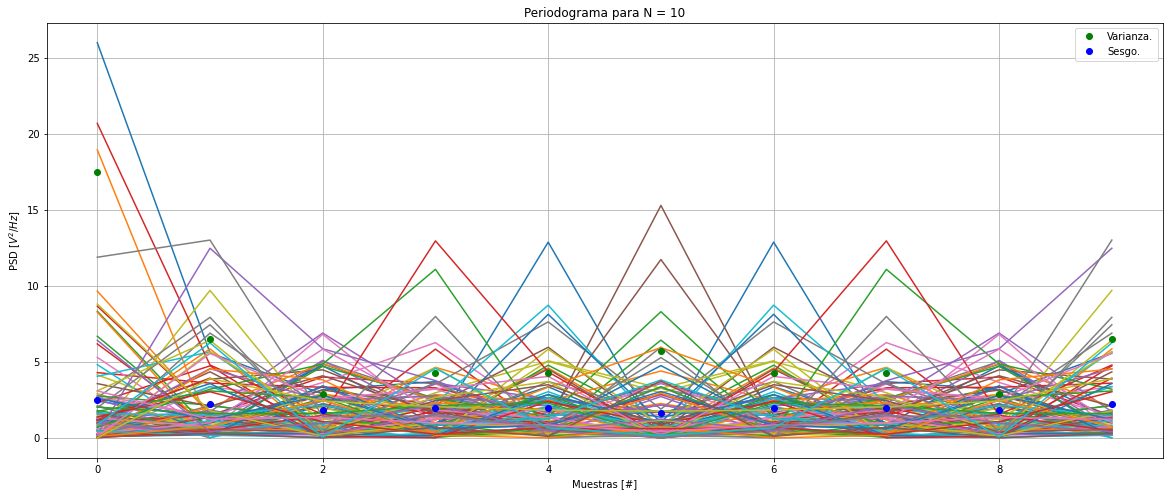

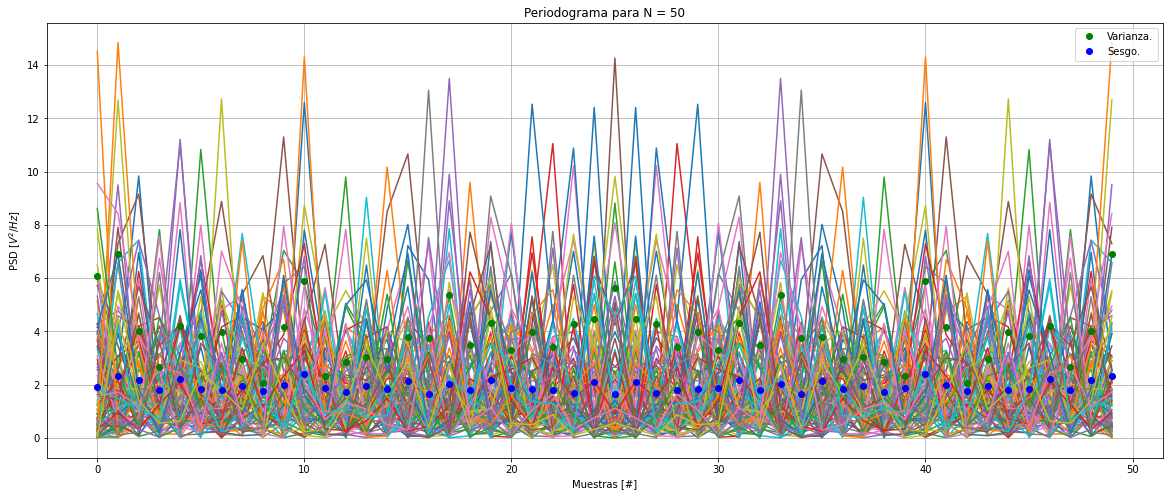

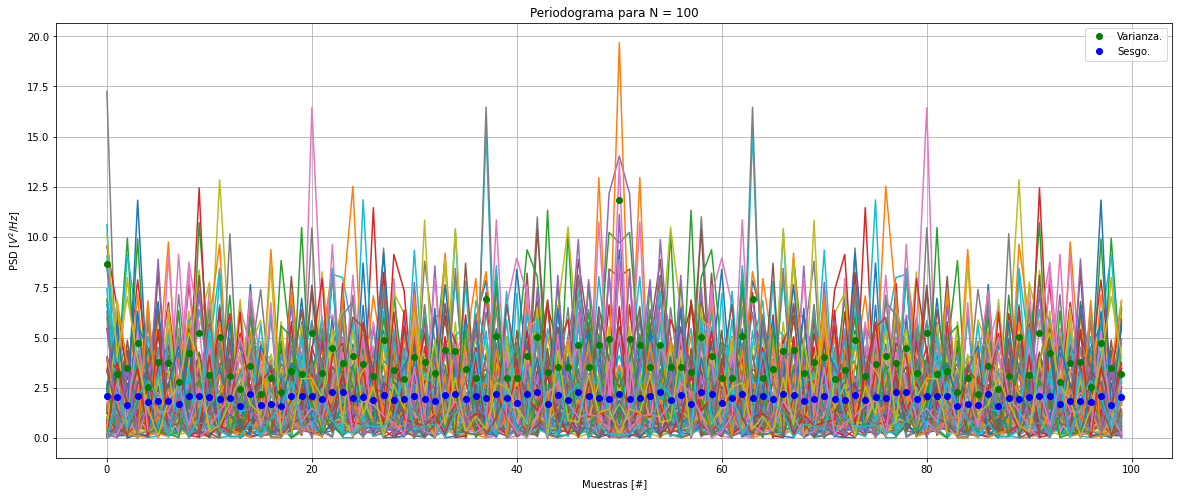

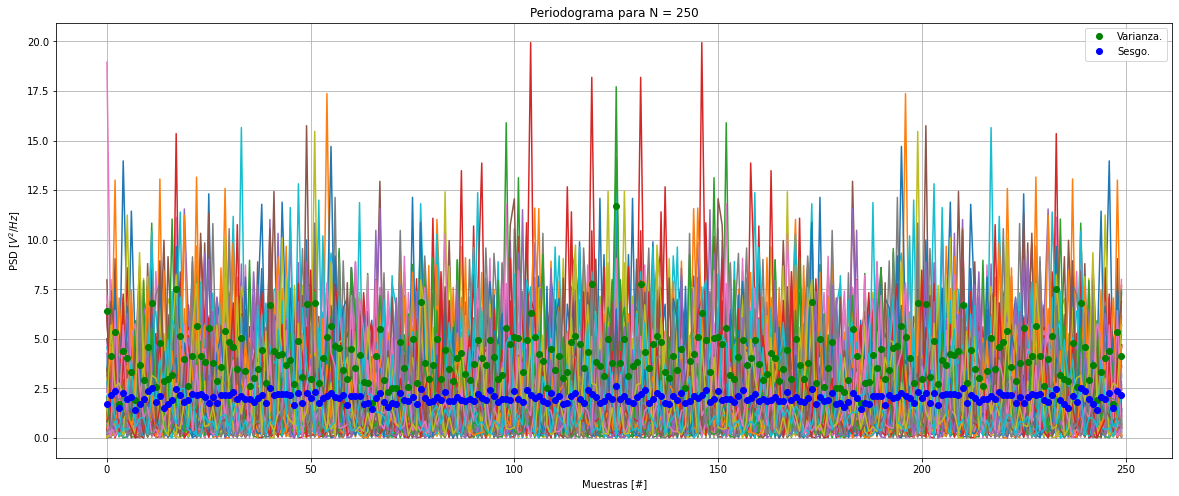

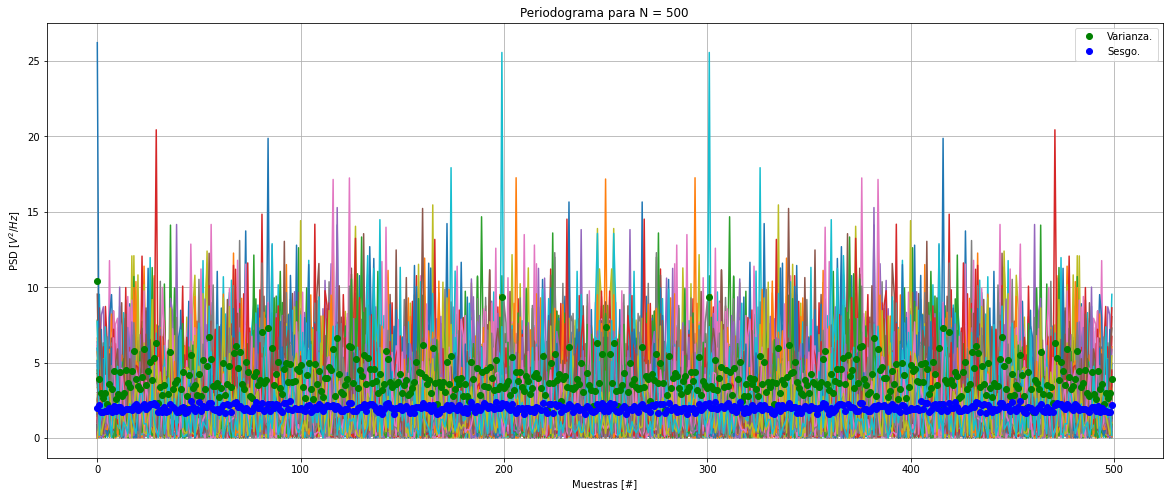

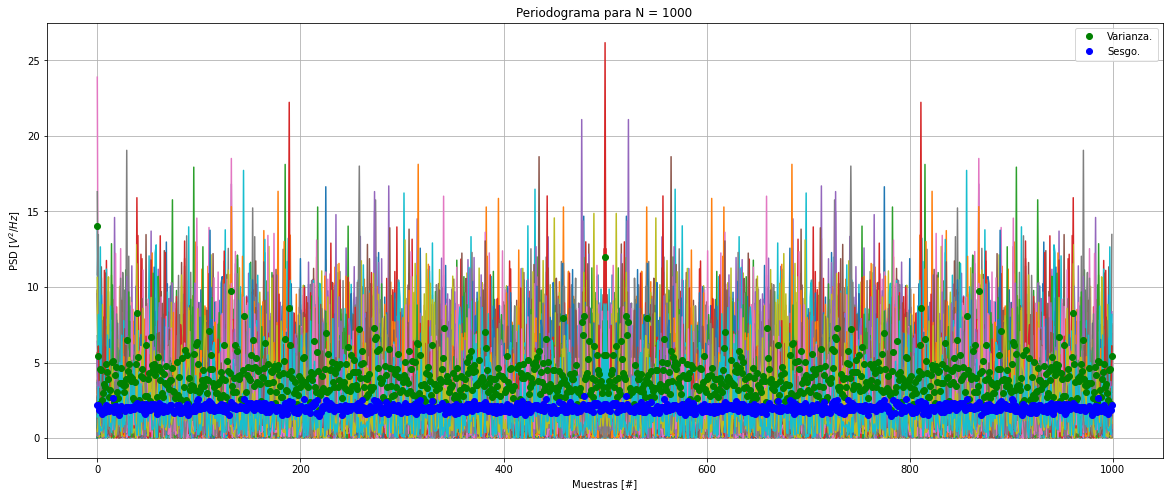

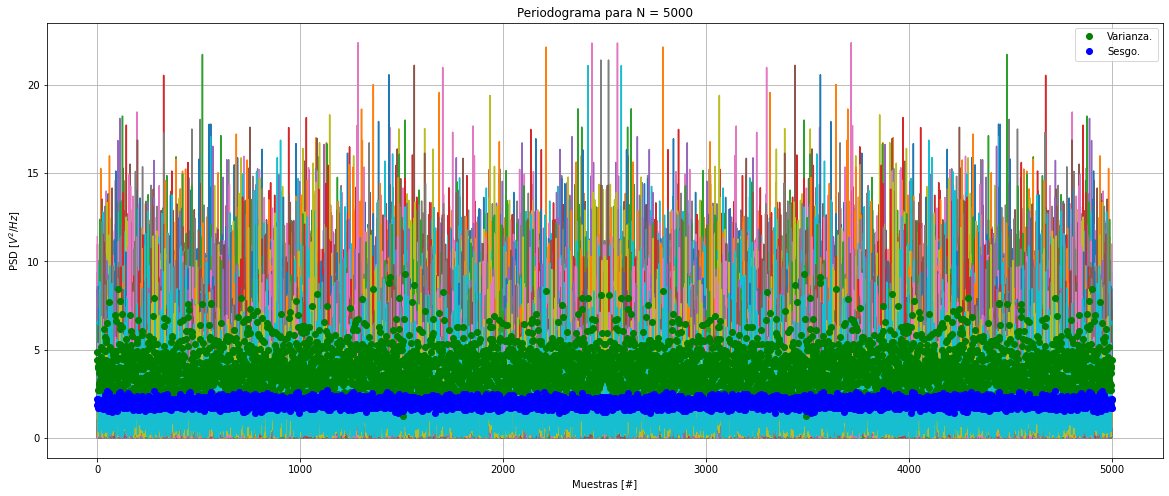

In [27]:
import numpy as npy
import scipy as spy
import matplotlib.pyplot as plt

N = npy.array([10, 50, 100, 250, 500, 1000, 5000])
fs = 1000
sigma = 2
mu = 0
M = 100 # Realizaciones de señal.

sesgo = []
varianza = []
matrix = []

k = 0

for i in N:    
    # Creo una matriz de muestras N x M y su espectro.
    x = npy.random.normal(mu,npy.sqrt(sigma),(i,M))
    px = (abs(npy.fft.fft(x,i,axis=0)) ** 2) / i
    
    var = npy.var(px,axis=1) # Vector columna de la varianza para cada bin.
    varianza.append(npy.mean(var)) # Vector columna de la varianza para cada bin.
    
    ses = npy.mean(px,axis=1) # Varianza para cada espectro.
    sesgo.append(npy.mean(ses) - sigma) # Sesgo para cada espectro.
                                        # Parámetro real - estimador
    
    
    # Ploteos
    plt.figure(k,figsize=(20,8))
    plt.plot(px)
    plt.plot(var,'go',label='Varianza.')
    plt.plot(ses,'bo',label='Sesgo.')
    plt.title('Periodograma para N = ' + str(i))
    plt.xlabel('Muestras [#]')
    plt.ylabel('PSD [$V^2 / Hz$]')
    plt.legend()
    plt.grid()
    k=k+1

In [25]:

tus_resultados_per = []
tus_resultados_per.append([sesgo[0],varianza[0]])
tus_resultados_per.append([sesgo[1],varianza[1]])
tus_resultados_per.append([sesgo[2],varianza[2]])
tus_resultados_per.append([sesgo[3],varianza[3]])
tus_resultados_per.append([sesgo[4],varianza[4]])
tus_resultados_per.append([sesgo[5],varianza[5]])
tus_resultados_per.append([sesgo[6],varianza[6]])

#######################################
# Tu simulación que genere resultados #
#######################################
"""
tus_resultados_per = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]"""


df = DataFrame(tus_resultados_per, columns=['$s_P$', '$v_P$'],
               index=N)
HTML(df.to_html())


<div class="alert alert-block alert-warning">
<b>Comentario:</b> Realizando las simulaciones determiné que a mayor cantidad de realizaciones (M) mejor es la visualiación del sesgo y la varianza en los ploteos. Con 10 visualizaciones no se lograba apreciar visualmente hacia donde tendía la varianza ya que presentaba mucha dispersión entre cada valor del vector. También se reduce la dispersión con un mayor número de N.
    
Respecto al periodograma, se puede apreciar que la varianza no tiende a 0 a medida que el número de muestras N se va haciendo mayor, sino que tiende a $\sigma^4=4$ como se observa en la tabla. Además el sesgo es cercano a 0 y decrece al aumentar N. De esta manera puedo comprobar que asintóticamente insesgado.
</div>

<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

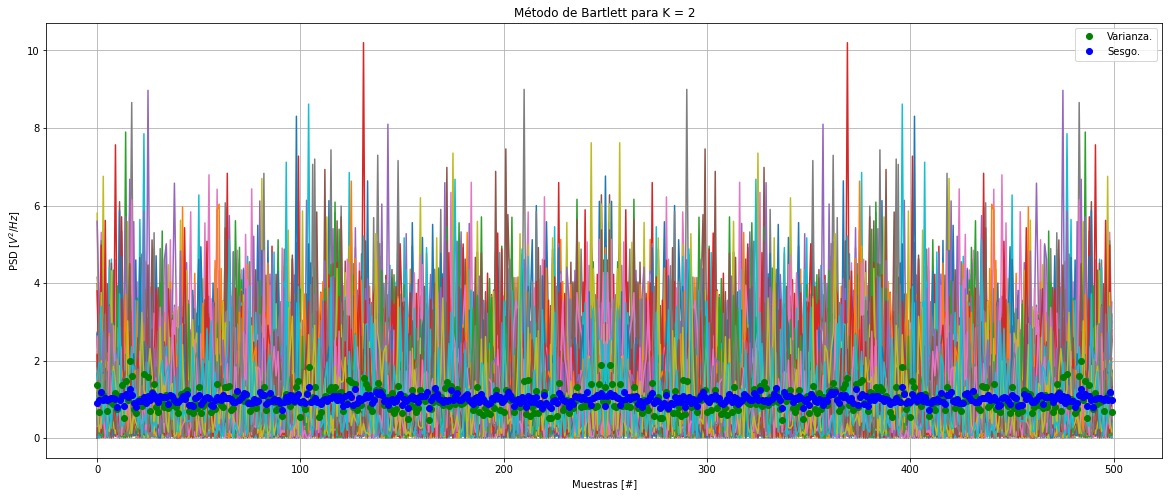

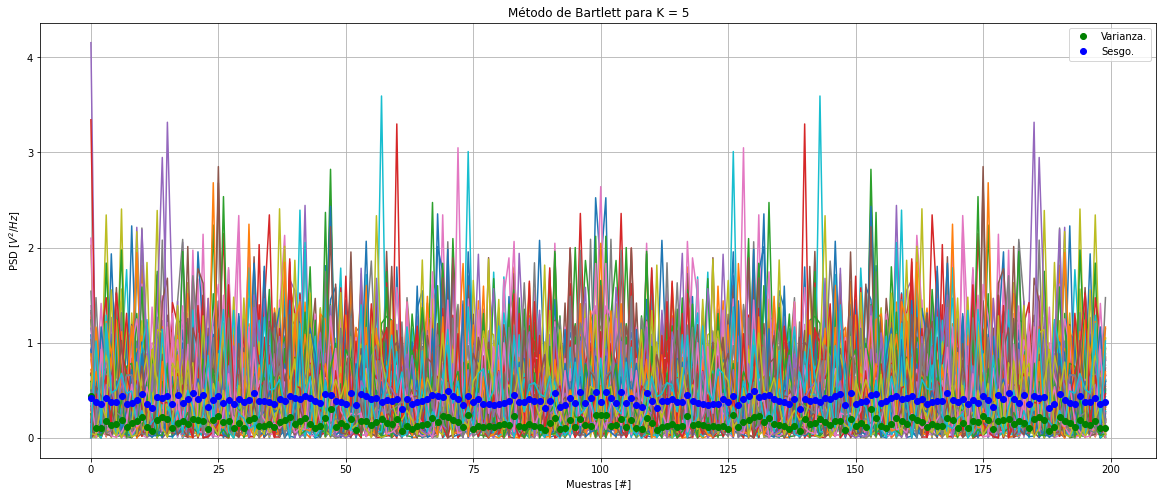

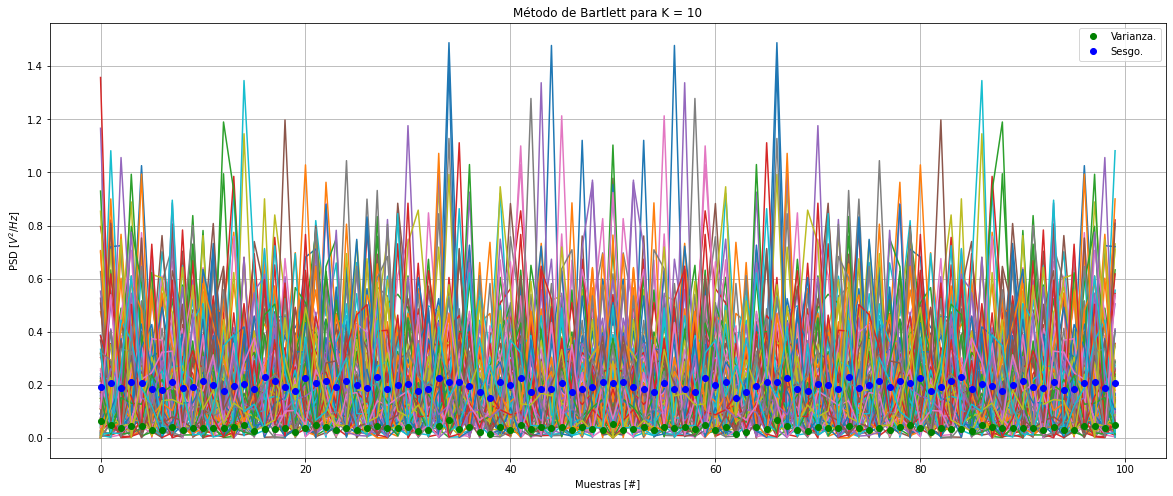

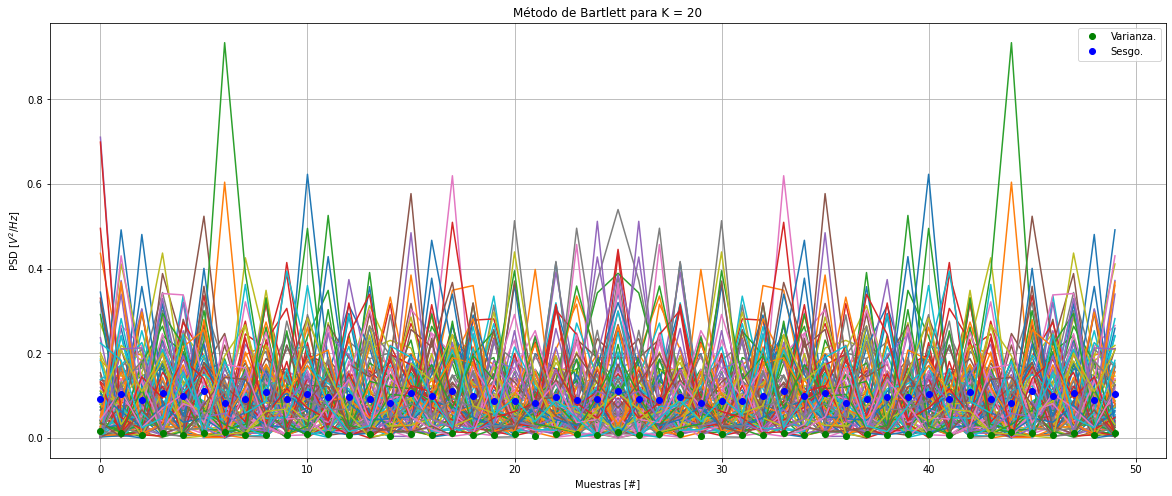

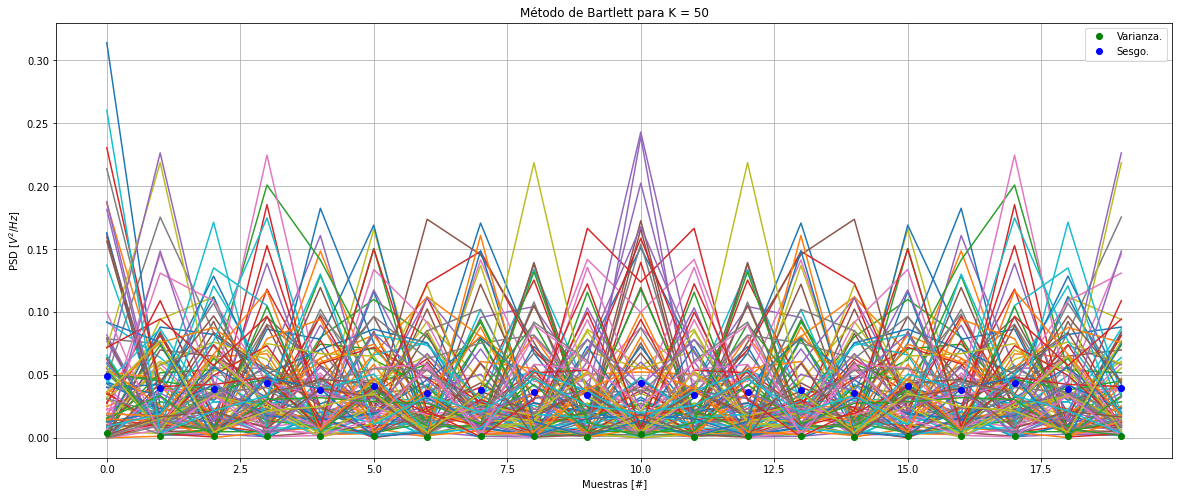

In [30]:
import numpy as npy
import scipy as spy
import matplotlib.pyplot as plt
from scipy import signal

K = npy.array([2, 5, 10, 20, 50])

N = 1000
M = 100 # Realizaciones de señal.
fs = 1000

sigma = 2
mu = 0
k = 0

x = npy.random.normal(mu,npy.sqrt(sigma),(N,M)) # Matriz de muestras de N x M

varianza = []
sesgo = []

# Desarrollo del método de Bartlett.
for i in K:
    L = int((len(x) / i)) # L: longitud de los bloques (1000 / i)
    n1 = 0 # Posición inicial del slice.
    px = 0
    j = 0
   
    bloque = x[n1:n1+L] / i # Division de la muestra en K bloques
                            # de L longitud.
    
    for j in range(i):    
        px = px + ( (abs(npy.fft.fft(bloque,axis=0)) ** 2) / L )
        n1 = n1 + L
        
    # Varianza y sesgo.
    var = npy.var(px,axis=1)
    ses = npy.mean(px,axis=1)    
    
    varianza.append(npy.mean(var))
    sesgo.append(npy.mean(ses) - sigma)
    
    
    # Ploteo
    plt.figure(k,figsize=(20,8))
    plt.plot(px)
    plt.plot(var,'go',label='Varianza.')
    plt.plot(ses,'bo',label='Sesgo.')
    plt.title('Método de Bartlett para K = ' + str(i))
    plt.xlabel('Muestras [#]')
    plt.ylabel('PSD [$V^2 / Hz$]')
    plt.legend()
    plt.grid()
    k=k+1

In [31]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados_bar = []
tus_resultados_bar.append([sesgo[0],varianza[0]])
tus_resultados_bar.append([sesgo[1],varianza[1]])
tus_resultados_bar.append([sesgo[2],varianza[2]])
tus_resultados_bar.append([sesgo[3],varianza[3]])
tus_resultados_bar.append([sesgo[4],varianza[4]])

"""
tus_resultados_bartlett = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]"""

df = DataFrame(tus_resultados_bar, columns=['$s_B$', '$v_B$'],
               index=K)
HTML(df.to_html())


<div class="alert alert-block alert-warning">
<b>Comentario:</b> En los gráficos obtenidos se puede evidenciar una dismunición de la resolución espectral a medida que se incrementa el valor de bloques K sobre los que se divide la muestra. Esto es debido a que una mayor cantidad (K) de bloques implica que éstos sean más cortos (menor L).
En cuanto a la tabla de valores, en comparación con el método del punto 1 (periodograma) podemos observar una reducción del sesgo y de la varianza. Además podemos comprobar que la varianza decrece en forma asintótica al aumentar el valor de K. Cabe mencionar que para este caso los bloques no deben ser solapados.
</div>

<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

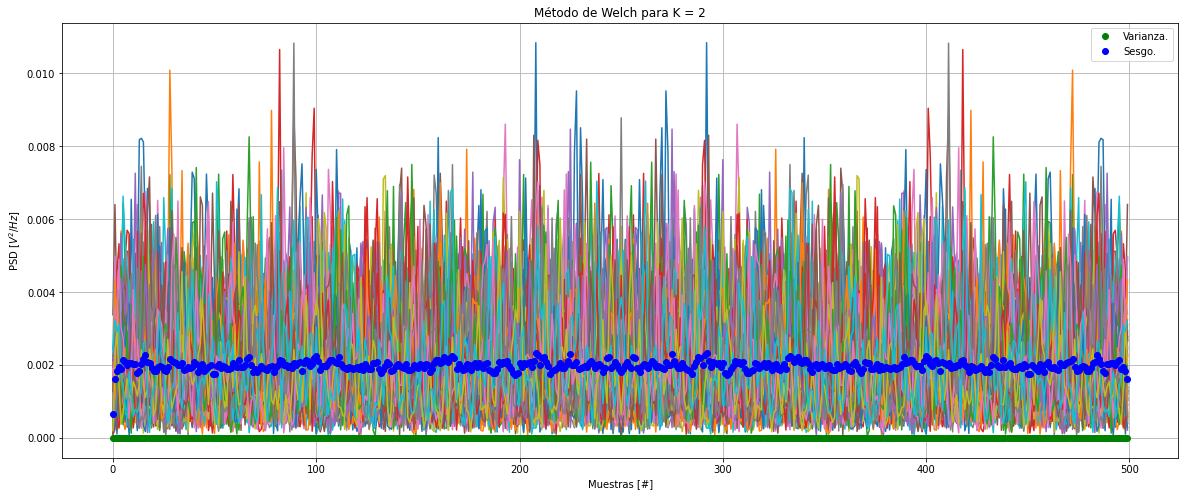

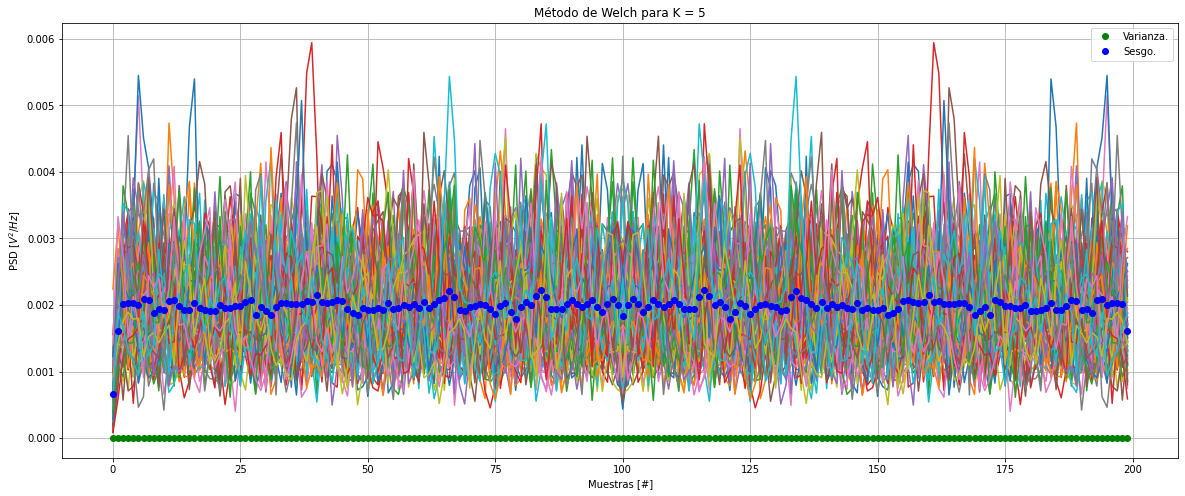

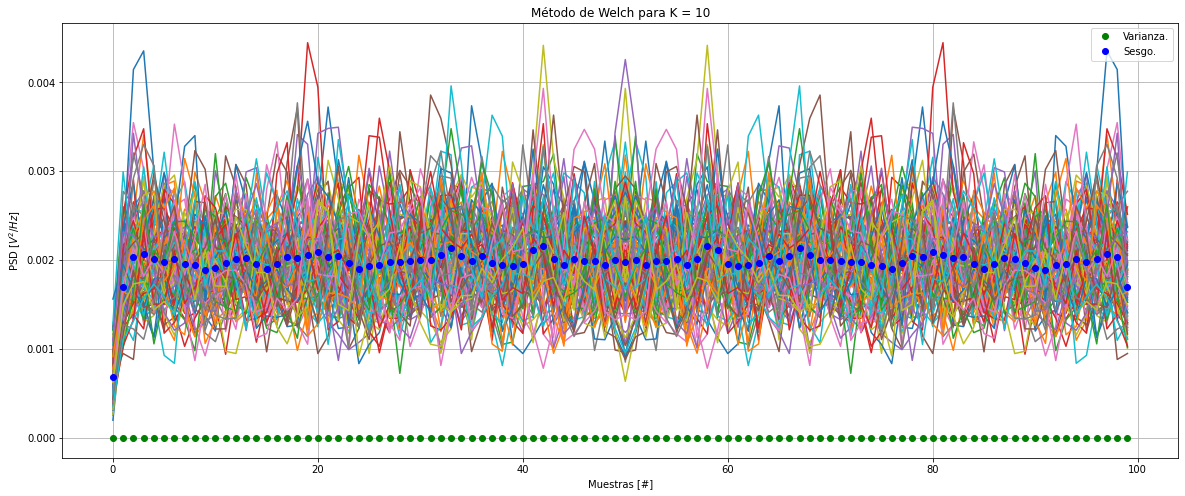

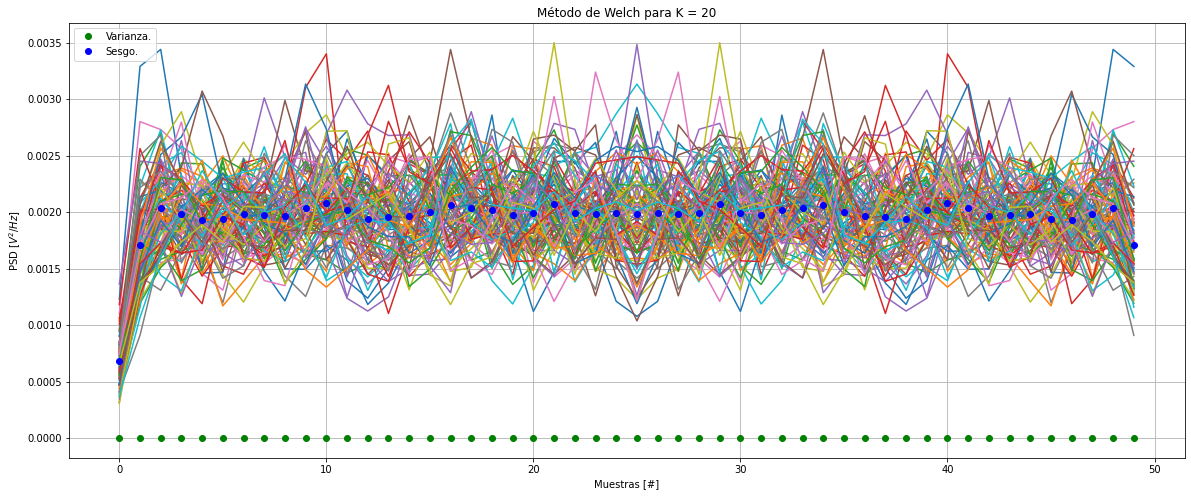

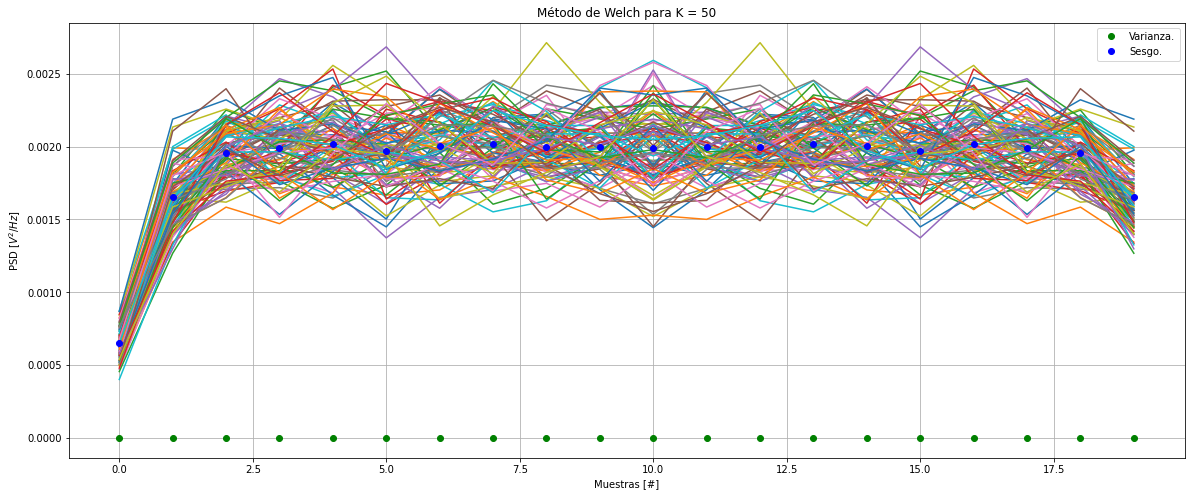

In [37]:
import numpy as npy
import scipy as spy
import matplotlib.pyplot as plt


sigma = 2
mu = 0

fs = 1000
M = 100 # Realizaciones de señal.
N = 1000

k = 0 

K = npy.array([2, 5, 10, 20, 50])
x = npy.random.normal(mu,npy.sqrt(sigma),(N,M))

varianza = []
sesgo = []

for i in K:
    L = int(len(x) / i)
    
    # Método de welch, recibe muestra, frec. de muestreo y longitud de los bloques.
    frec, psd = spy.signal.welch(x,fs,nperseg=L,axis=0,return_onesided=False)
    
    var = npy.var(psd,axis=1)
    varianza.append(npy.mean(var))
    
    ses = npy.mean(psd,axis=1)
    sesgo.append(npy.mean(ses) - sigma)
    
    # Ploteo.
    plt.figure(k,figsize=(20,8))
    plt.plot(psd)
    plt.plot(var,'go',label='Varianza.')
    plt.plot(ses,'bo',label='Sesgo.')
    plt.title('Método de Welch para K = ' + str(i))
    plt.xlabel('Muestras [#]')
    plt.ylabel('PSD [$V^2 / Hz$]')
    plt.legend()
    plt.grid()
    k=k+1   

In [38]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados_wel = []
tus_resultados_wel.append([sesgo[0],varianza[0]])
tus_resultados_wel.append([sesgo[1],varianza[1]])
tus_resultados_wel.append([sesgo[2],varianza[2]])
tus_resultados_wel.append([sesgo[3],varianza[3]])
tus_resultados_wel.append([sesgo[4],varianza[4]])

"""
tus_resultados_welch = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]"""

df = DataFrame(tus_resultados_wel, columns=['$s_B$', '$v_B$'],
               index=K)
HTML(df.to_html())


<div class="alert alert-block alert-warning">
<b>Comentario:</b> En comparación con el método anterior (Bartlett), se observa una disminución en la varianza y se puede comprobar que la misma se reduce asintóticamente al aumentar el tamaño de K. Además, se ve una disminución de sesgo respecto del caso anterior, pero para el método de Welch se mantiene prácticamente constante y no existiría variación al aumentar N. También es evidente la reducción de la resolución espectral al aumentar K.
</div>

<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

In [ ]:
# Simular para los siguientes tamaños de señal

R = 200 # realizaciones

N = 1000 # Muestras

# Obtené los valores XX para que cumplas con el enunciado
#SNR = np.array([ XX, XX ], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [ ]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$i_W$', '$i_X$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())
